In [139]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import optimize
import seaborn as sns
sns.set(style='whitegrid')

In [140]:
X = stats.norm(1,0.5)  #1是平均值，0.5是方差

In [141]:
X

In [142]:
X.mean()

1.0

In [143]:
X.median()

1.0

In [144]:
X.std()

0.5

In [145]:
X.var()

0.25

In [146]:
[X.moment(n) for n in range(5)]

[1.0, 1.0, 1.25, 1.75, 2.6875]

In [147]:
X.stats()

(array(1.), array(0.25))

In [148]:
X.pdf(1)

0.7978845608028654

In [149]:
X.pdf([0,1,2])

array([0.10798193, 0.79788456, 0.10798193])

In [150]:
X.cdf([-10,0,1,2,20])

array([1.43989244e-107, 2.27501319e-002, 5.00000000e-001, 9.77249868e-001,
       1.00000000e+000])

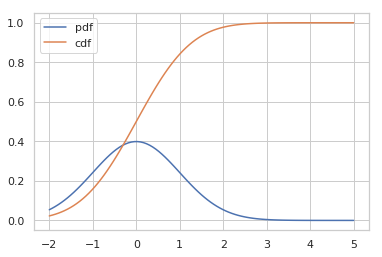

In [151]:
X=stats.norm(0,1)
x=np.linspace(-2,5,101)
plt.plot(x,X.pdf(x),label="pdf")
plt.plot(x,X.cdf(x),label="cdf")
plt.legend()

In [152]:
X.interval(0.979)

(-2.3079844749459575, 2.3079844749459593)

In [153]:
X.stats()

(array(0.), array(1.))

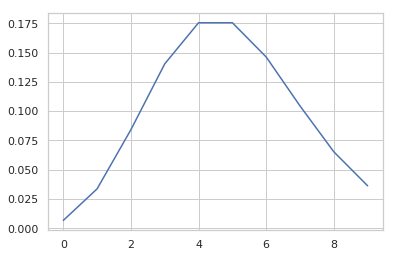

In [154]:
X=stats.poisson(5)    #泊松分布
x=np.arange(10)
plt.plot(x,X.pmf(x))

<BarContainer object of 100 artists>

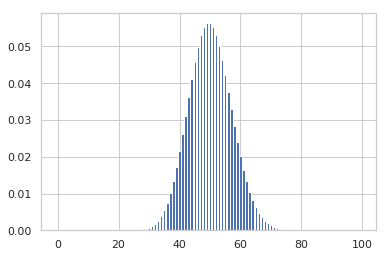

In [155]:
X=stats.poisson(50)    #泊松分布：50指平均发生率
x=np.arange(100)
plt.bar(x,X.pmf(x))

<BarContainer object of 10 artists>

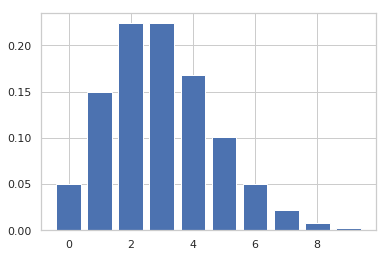

In [156]:
X=stats.poisson(3)   
x=np.arange(10)
plt.bar(x,X.pmf(x))

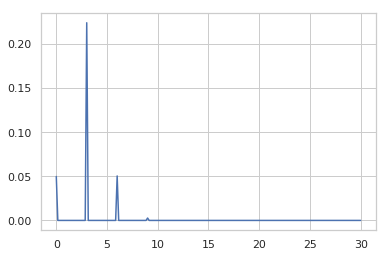

In [157]:
x = np.linspace(0,30,201)
plt.plot(x,X.pmf(x))

<BarContainer object of 20 artists>

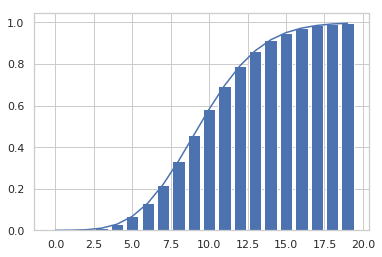

In [158]:
X=stats.poisson(10)    
x=np.arange(20)
plt.plot(x,X.cdf(x))
plt.bar(x,X.cdf(x))

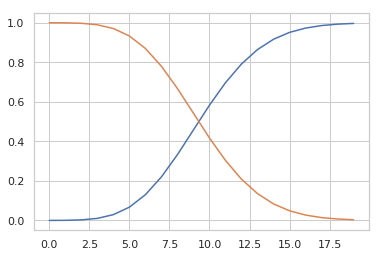

In [159]:
X=stats.poisson(10)    
x=np.arange(20)
plt.plot(x,X.cdf(x))
plt.plot(x,X.sf(x))

Text(0, 0.5, 'Poisson dist.')

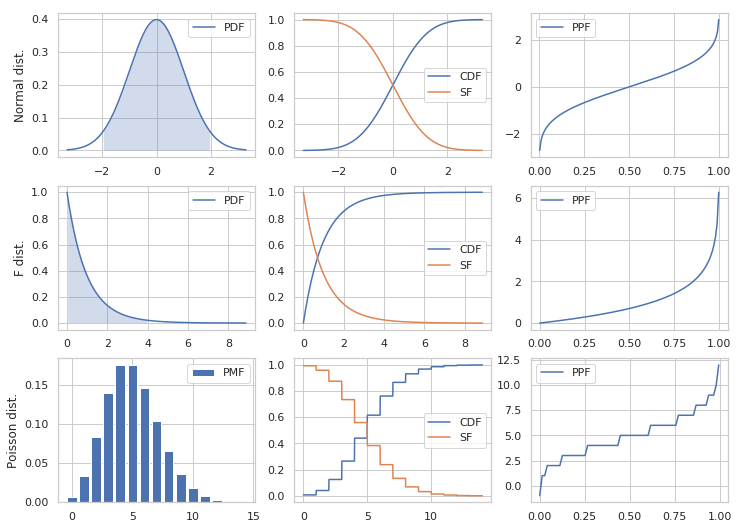

In [160]:
def plot_rv_distribution(X, axes=None):
    """Plot the PDF or PMF, CDF, SF and PPF of a given random variable"""
    if axes is None:
        fig, axes = plt.subplots(1, 3, figsize=(12, 3))
            
    x_min_999, x_max_999 = X.interval(0.999)
    x999 = np.linspace(x_min_999, x_max_999, 1000)
    x_min_95, x_max_95 = X.interval(0.95)
    x95 = np.linspace(x_min_95, x_max_95, 1000)
    if hasattr(X.dist, "pdf"):
        axes[0].plot(x999, X.pdf(x999), label="PDF")
        axes[0].fill_between(x95, X.pdf(x95), alpha=0.25)
    else:
        #discrete random variables do not have a pdf method,instead we use pmf:
        x999_int = np.unique(x999.astype(int))
        axes[0].bar(x999_int, X.pmf(x999_int), label="PMF")
    axes[1].plot(x999, X.cdf(x999), label="CDF")
    axes[1].plot(x999, X.sf(x999), label="SF")
    axes[2].plot(x999, X.ppf(x999), label="PPF")
    for ax in axes:
        ax.legend()
fig, axes = plt.subplots(3, 3, figsize=(12, 9))
X = stats.norm()
plot_rv_distribution(X, axes=axes[0, :])
axes[0, 0].set_ylabel("Normal dist.")
X = stats.f(2, 50)
plot_rv_distribution(X, axes=axes[1, :])
axes[1, 0].set_ylabel("F dist.")
X = stats.poisson(5)
plot_rv_distribution(X, axes=axes[2, :])
axes[2, 0].set_ylabel("Poisson dist.")

In [161]:
X.rvs(10)

array([5, 6, 7, 3, 3, 7, 9, 3, 6, 4])

(array([  2.,   2.,   6.,   6.,  10.,   7.,  18.,  26.,  24.,  47.,  67.,
         96., 124., 182., 199., 270., 283., 346., 461., 468., 535., 586.,
        579., 599., 646., 613., 565., 550., 485., 448., 358., 343., 261.,
        195., 157., 130.,  91.,  67.,  46.,  31.,  21.,  19.,  11.,   7.,
          3.,   3.,   2.,   2.,   0.,   3.]),
 array([-3.72565776, -3.57124166, -3.41682557, -3.26240948, -3.10799339,
        -2.9535773 , -2.79916121, -2.64474512, -2.49032903, -2.33591294,
        -2.18149685, -2.02708075, -1.87266466, -1.71824857, -1.56383248,
        -1.40941639, -1.2550003 , -1.10058421, -0.94616812, -0.79175203,
        -0.63733594, -0.48291985, -0.32850375, -0.17408766, -0.01967157,
         0.13474452,  0.28916061,  0.4435767 ,  0.59799279,  0.75240888,
         0.90682497,  1.06124106,  1.21565715,  1.37007325,  1.52448934,
         1.67890543,  1.83332152,  1.98773761,  2.1421537 ,  2.29656979,
         2.45098588,  2.60540197,  2.75981806,  2.91423416,  3.06865025,
 

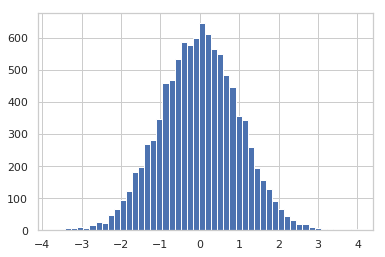

In [162]:
e=np.random.randn(10000)
plt.hist(e,50)

(array([  2.,   1.,   3.,   3.,   7.,   8.,  12.,  26.,  23.,  32.,  51.,
         57.,  98., 133., 154., 197., 237., 311., 344., 406., 436., 492.,
        531., 584., 572., 593., 543., 575., 526., 527., 453., 397., 382.,
        279., 237., 187., 155., 113.,  92.,  69.,  48.,  37.,  20.,  17.,
         13.,   6.,   5.,   4.,   0.,   2.]),
 array([-3.79331672, -3.64460904, -3.49590136, -3.34719368, -3.198486  ,
        -3.04977832, -2.90107064, -2.75236296, -2.60365528, -2.4549476 ,
        -2.30623993, -2.15753225, -2.00882457, -1.86011689, -1.71140921,
        -1.56270153, -1.41399385, -1.26528617, -1.11657849, -0.96787081,
        -0.81916313, -0.67045546, -0.52174778, -0.3730401 , -0.22433242,
        -0.07562474,  0.07308294,  0.22179062,  0.3704983 ,  0.51920598,
         0.66791366,  0.81662134,  0.96532901,  1.11403669,  1.26274437,
         1.41145205,  1.56015973,  1.70886741,  1.85757509,  2.00628277,
         2.15499045,  2.30369813,  2.45240581,  2.60111348,  2.74982116,
 

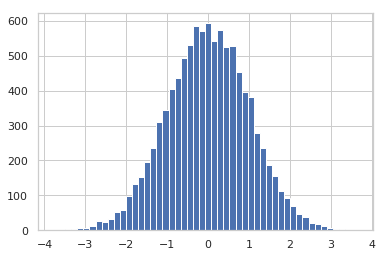

In [163]:
X = stats.norm(0,1)
b = X.rvs(10000)
plt.hist(b,50)

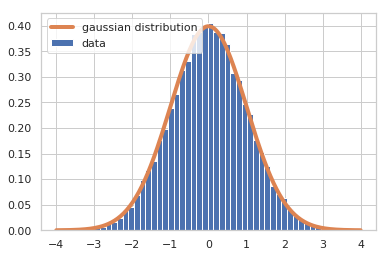

In [167]:
X = stats.norm(0,1)
b = X.rvs(10000)
#fig=plt.figure(figsize(10,5))
plt.hist(b,50,density=1,label='data')
x=np.linspace(-4,4,200)
X=stats.norm(0,1)
plt.plot(x,X.pdf(x),lw=4,label='gaussian distribution')
plt.legend()

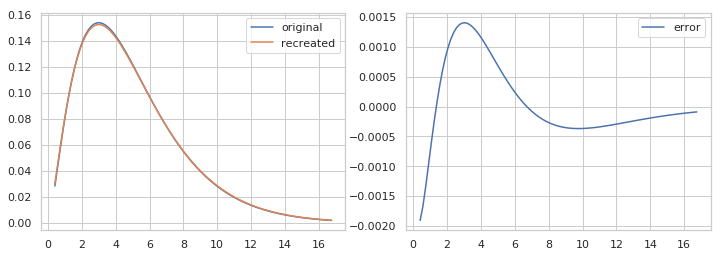

In [170]:
X = stats.chi2(df=5)
X_samples = X.rvs(500)
df, loc, scale = stats.chi2.fit(X_samples)
df, loc, scale
(5.2886783664198465, 0.0077028130326141243, 0.93310362175739658)
Y = stats.chi2(df=df, loc=loc, scale=scale)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
x_lim = X.interval(.99)
x = np.linspace(*x_lim, num=100)
axes[0].plot(x, X.pdf(x), label="original")
axes[0].plot(x, Y.pdf(x), label="recreated")
axes[0].legend()
axes[1].plot(x, X.pdf(x) - Y.pdf(x), label="error")
axes[1].legend()

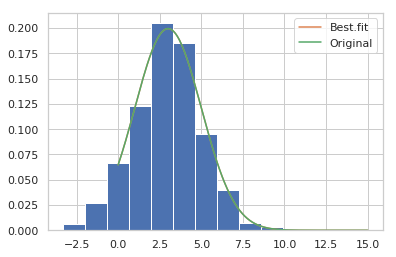

In [176]:
X = stats.norm(3,2)
X_samples = X.rvs(500)
loc, scale = stats.norm.fit(X_samples)
Y = stats.norm(loc=loc, scale=scale)
x = np.linspace(0,15,200)
plt.hist(X_samples,density=1)
plt.plot(x,X.pdf(x),label='Best.fit')
plt.plot(x, X.pdf(x),label='Original')
plt.legend()